In [1]:
# Import pandas
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


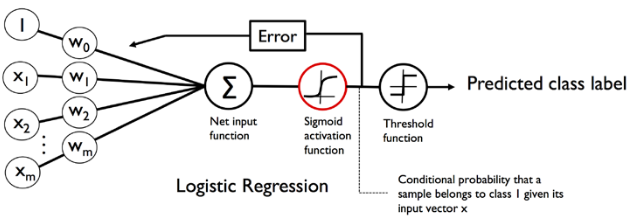# 

In [2]:
data = pd.read_excel("C:/Users/Sushanth S/Class Lectures/Module-2/Lecture-5/NLP_Project/Labelled_data.xlsx")

In [3]:
data.head()

,Unnamed: 0,review,Cleaned Reviews,POS_tagged,Lemma,Vader Sentiment,Sentiment
0,0,Once again Mr. Costner has dragged out a movie...,Once again Mr Costner has dragged out a movie ...,"[('Mr', 'n'), ('Costner', 'n'), ('dragged', 'v...",Mr Costner drag movie far long necessary Asi...,0.9373,Positive
1,1,Story of a man who has unnatural feelings for ...,Story of a man who has unnatural feelings for ...,"[('Story', 'n'), ('man', 'n'), ('unnatural', '...",Story man unnatural feeling pig Starts openi...,0.8176,Positive
2,2,Bromwell High is a cartoon comedy. It ran at t...,Bromwell High is a cartoon comedy It ran at th...,"[('Bromwell', 'n'), ('High', 'n'), ('cartoon',...",Bromwell High cartoon comedy run time progra...,-0.1027,Neutral
3,3,OK its not the best film I've ever seen but at...,OK its not the best film I ve ever seen but at...,"[('OK', None), ('best', 'a'), ('film', 'n'), (...",OK best film ever see time able sit watch TW...,0.9222,Positive
4,4,I was looking forward to this movie. Trustwort...,I was looking forward to this movie Trustworth...,"[('looking', 'v'), ('forward', 'r'), ('movie',...",look forward movie Trustworthy actor interes...,0.9353,Positive


In [4]:
# inorder to remove unnamed row:
mydata = data.drop('Unnamed: 0', axis=1)
mydata.head()

,review,Cleaned Reviews,POS_tagged,Lemma,Vader Sentiment,Sentiment
0,Once again Mr. Costner has dragged out a movie...,Once again Mr Costner has dragged out a movie ...,"[('Mr', 'n'), ('Costner', 'n'), ('dragged', 'v...",Mr Costner drag movie far long necessary Asi...,0.9373,Positive
1,Story of a man who has unnatural feelings for ...,Story of a man who has unnatural feelings for ...,"[('Story', 'n'), ('man', 'n'), ('unnatural', '...",Story man unnatural feeling pig Starts openi...,0.8176,Positive
2,Bromwell High is a cartoon comedy. It ran at t...,Bromwell High is a cartoon comedy It ran at th...,"[('Bromwell', 'n'), ('High', 'n'), ('cartoon',...",Bromwell High cartoon comedy run time progra...,-0.1027,Neutral
3,OK its not the best film I've ever seen but at...,OK its not the best film I ve ever seen but at...,"[('OK', None), ('best', 'a'), ('film', 'n'), (...",OK best film ever see time able sit watch TW...,0.9222,Positive
4,I was looking forward to this movie. Trustwort...,I was looking forward to this movie Trustworth...,"[('looking', 'v'), ('forward', 'r'), ('movie',...",look forward movie Trustworthy actor interes...,0.9353,Positive


In [5]:
# inorder to remove unnamed row:
mydata = mydata.drop(['POS_tagged'], axis=1)
mydata.head()

,review,Cleaned Reviews,Lemma,Vader Sentiment,Sentiment
0,Once again Mr. Costner has dragged out a movie...,Once again Mr Costner has dragged out a movie ...,Mr Costner drag movie far long necessary Asi...,0.9373,Positive
1,Story of a man who has unnatural feelings for ...,Story of a man who has unnatural feelings for ...,Story man unnatural feeling pig Starts openi...,0.8176,Positive
2,Bromwell High is a cartoon comedy. It ran at t...,Bromwell High is a cartoon comedy It ran at th...,Bromwell High cartoon comedy run time progra...,-0.1027,Neutral
3,OK its not the best film I've ever seen but at...,OK its not the best film I ve ever seen but at...,OK best film ever see time able sit watch TW...,0.9222,Positive
4,I was looking forward to this movie. Trustwort...,I was looking forward to this movie Trustworth...,look forward movie Trustworthy actor interes...,0.9353,Positive


In [6]:
data = mydata[['review','Sentiment']]

In [7]:
data.head()

,review,Sentiment
0,Once again Mr. Costner has dragged out a movie...,Positive
1,Story of a man who has unnatural feelings for ...,Positive
2,Bromwell High is a cartoon comedy. It ran at t...,Neutral
3,OK its not the best film I've ever seen but at...,Positive
4,I was looking forward to this movie. Trustwort...,Positive


### Bag of words
One thing we could do to represent the twits as equal-sized vectors of numbers is the following:

Create a list (vocabulary) with all the unique words in the whole corpus of twits.
We construct a feature vector from each twit that contains the counts of how often each word occurs in the particular twit
Note that since the unique words in each twit represent only a small subset of all the words in the bag-of-words vocabulary, the feature vectors will mostly consist of zeros

Let's construct the bag of words. We will work with a smaller example for illustrative purposes, and at the end we will work with our real data.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

twits = [
    'This is amazing!',
    'ML is the best, yes it is',
    'I am not sure about how this is going to end...'
]

count = CountVectorizer()
bag = count.fit_transform(twits)

count.vocabulary_

{'this': 13,
 'is': 7,
 'amazing': 2,
 'ml': 9,
 'the': 12,
 'best': 3,
 'yes': 15,
 'it': 8,
 'am': 1,
 'not': 10,
 'sure': 11,
 'about': 0,
 'how': 6,
 'going': 5,
 'to': 14,
 'end': 4}

In [9]:
bag.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]], dtype=int64)

## How relevant are words? Term frequency-inverse document frequency
We could use these raw term frequencies to score the words in our algorithm. There is a problem though: If a word is very frequent in all documents, then it probably doesn't carry a lot of information. In order to tacke this problem we can use term frequency-inverse document frequency, which will reduce the score the more frequent the word is accross all twits. It is calculated like this:

tf(t,d) is the raw term frequency descrived above. idf(t,d) is the inverse document frequency, than can be calculated as follows:

 
where n is the total number of documents and df(t,d) is the number of documents where the term t appears.

The 1 addition in the denominator is just to avoid zero term for terms that appear in all documents. Ans the log ensures that low frequency term don't get too much weight.

Fortunately for us scikit-learn does all those calculations for us:

In [11]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
data_copy = data.copy()

In [13]:
data_copy.head()

,review,Sentiment
0,Once again Mr. Costner has dragged out a movie...,Positive
1,Story of a man who has unnatural feelings for ...,Positive
2,Bromwell High is a cartoon comedy. It ran at t...,Neutral
3,OK its not the best film I've ever seen but at...,Positive
4,I was looking forward to this movie. Trustwort...,Positive


In [14]:
replace_map_comp = {'Sentiment': {'Negative': -1, 'Positive': 1, 'Neutral': 0}}

print(replace_map_comp)

{'Sentiment': {'Negative': -1, 'Positive': 1, 'Neutral': 0}}


In [15]:
data_copy.replace(replace_map_comp, inplace=True)

print(data_copy.head())

                                              review  Sentiment
0  Once again Mr. Costner has dragged out a movie...          1
1  Story of a man who has unnatural feelings for ...          1
2  Bromwell High is a cartoon comedy. It ran at t...          0
3  OK its not the best film I've ever seen but at...          1
4  I was looking forward to this movie. Trustwort...          1


In [16]:
from sklearn.model_selection import train_test_split

# split the dataset in train and test
X = data_copy['review']
y = data_copy['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

## Removing special characters and "trash"
We still se a very uneaven distribution. If you look closer, you'll see that we're also taking into consideration punctuation signs ('-', ',', etc) and other html tags like &amp. We can definitely remove them for the sentiment analysis, but we will try to keep the emoticons, since those do have a sentiment load:

In [17]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

print(preprocessor('This!! twit man :) is <b>nice</b>'))

this twit man is nice :)


In [18]:
# tokenizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

print(tokenizer('Hi there, I am loving this, like with a lot of love'))
print(tokenizer_porter('Hi there, I am loving this, like with a lot of love'))


['Hi', 'there,', 'I', 'am', 'loving', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']
['Hi', 'there,', 'I', 'am', 'love', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
stop = stopwords.words('english')

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__preprocessor': [None, preprocessor],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__preprocessor': [None, preprocessor],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [20]:
# Note: This may take a long while to execute, like... 1 or 2 hours
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.9min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:794: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change fr

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [21]:
print('Best parameter set: ' + str(gs_lr_tfidf.best_params_))
print('Best accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'clf__C': 10.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__preprocessor': <function preprocessor at 0x000001AAE51430D8>, 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',

In [22]:
clf = gs_lr_tfidf.best_estimator_
print('Accuracy in test: %.3f' % clf.score(X_test, y_test))

Accuracy in test: 0.686


In [31]:
twits = [
    "This is really bad, I don't like it at all",
    "I love this!",
    "let me try out expecting results",
    "result is notgood"
]

preds = clf.predict(twits)

for i in range(len(twits)):
    print(f'{twits[i]} --> {preds[i]}')

This is really bad, I don't like it at all --> -1
I love this! --> 1
let me try out expecting results --> -1
result is notgood --> -1
